# SABBO
Contents:<br>
Kaplan-Meier-Curve


###### tsolve = survivalTime

In [47]:
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


In [48]:
# Read CSV
csv_file = 'QUBOClusteringData.csv'

originDf = pd.read_csv(csv_file)

originDf.head()
    

,tsolve,alg,nvars,seed,runseed
0,8.0,UEDA,5,1,1
1,7.0,GR,5,1,1
2,13.0,RS,5,1,1
3,73.0,UEDA,5,1,2
4,4.0,GR,5,1,2


### Kaplan-Meier-Curve

In [49]:
# Only keep UEDA
# @Config
algorithm = "UEDA"
nvars = 10


algDf = originDf[(originDf["alg"] == algorithm) & (originDf["nvars"] == nvars)]
# append the 0.0 row 
# row = pd.DataFrame({"tsolve": 0}, index=[9999])
#algDf = pd.concat([algDf, row], ignore_index=True)
algDf = algDf.sort_values(by='tsolve')
algDf

,tsolve,alg,nvars,seed,runseed
1605,3.0,UEDA,10,4,6
1737,7.0,UEDA,10,8,10
1782,12.0,UEDA,10,10,5
1665,16.0,UEDA,10,6,6
1659,17.0,UEDA,10,6,4
...,...,...,...,...,...
1695,NaN,UEDA,10,7,6
1713,NaN,UEDA,10,8,2
1719,NaN,UEDA,10,8,4
1734,NaN,UEDA,10,8,9


In [50]:
# make the Time - m - n - dataframe
allTimes = algDf['tsolve'].dropna()         # drop 12 NaN values for var = 10
tmpDict1 = dict.fromkeys(set(allTimes), 0)


for time in allTimes:       # number of algorithms terminated at that time
    tmpDict1[time] += 1


done = 0       # After the first time is passed, one alg is done already

tmpDict2 = dict.fromkeys(set(allTimes), len(allTimes))                    
nDict = {0.0 : 0}
nDict.update(tmpDict2)

for key, value in tmpDict1.items():
    tmpDict2[key] = tmpDict2[key] - done
    done+=value

mDict = {0.0 : 0}
mDict.update(tmpDict1)  # How many algorithms stop per time unit?

nAlg = len(allTimes)

nDict = {0.0 : nAlg}
nDict.update(tmpDict2)  # How many algorithms do run at that time still?

print(mDict)
print(nDict)

# create the dataframes
mDf = pd.DataFrame.from_dict(mDict, orient="index", columns=["m Died"])
nDf = pd.DataFrame.from_dict(nDict, orient="index", columns=["n Risk"])     # You stay at risk of dying at the time you die

dfOverall = pd.merge(mDf, nDf, left_index=True, right_index=True, how='outer')


del tmpDict1
del tmpDict2

{0.0: 0, 3.0: 1, 7.0: 1, 12.0: 1, 16.0: 1, 17.0: 1, 24.0: 1, 27.0: 1, 28.0: 1, 37.0: 1, 39.0: 1, 40.0: 1, 44.0: 1, 49.0: 1, 50.0: 1, 51.0: 1, 52.0: 1, 53.0: 1, 56.0: 1, 57.0: 1, 60.0: 1, 66.0: 1, 68.0: 1, 71.0: 1, 74.0: 1, 75.0: 1, 78.0: 1, 82.0: 2, 83.0: 1, 85.0: 1, 88.0: 2, 89.0: 1, 93.0: 1, 94.0: 1, 103.0: 1, 109.0: 1, 110.0: 1, 112.0: 1, 113.0: 1, 114.0: 1, 115.0: 1, 118.0: 1, 120.0: 1, 122.0: 1, 123.0: 1, 126.0: 1, 128.0: 1, 129.0: 1, 130.0: 1, 131.0: 1, 136.0: 1, 138.0: 2, 141.0: 1, 148.0: 1, 150.0: 2, 151.0: 1, 152.0: 1, 155.0: 1, 158.0: 1, 165.0: 1, 168.0: 1, 171.0: 1, 176.0: 2, 177.0: 1, 182.0: 1, 207.0: 1, 209.0: 1, 210.0: 1, 215.0: 1, 218.0: 1, 234.0: 1, 240.0: 1, 247.0: 1, 276.0: 1, 278.0: 2, 281.0: 1, 299.0: 1, 304.0: 1, 328.0: 1, 407.0: 1, 411.0: 1, 416.0: 1, 441.0: 1}
{0.0: 88, 3.0: 88, 7.0: 87, 12.0: 86, 16.0: 85, 17.0: 84, 24.0: 83, 27.0: 82, 28.0: 81, 37.0: 80, 39.0: 79, 40.0: 78, 44.0: 77, 49.0: 76, 50.0: 75, 51.0: 74, 52.0: 73, 53.0: 72, 56.0: 71, 57.0: 70, 60.0: 69

In [51]:
dfOverall

,m Died,n Risk
0.0,0,88
3.0,1,88
7.0,1,87
12.0,1,86
16.0,1,85
...,...,...
328.0,1,5
407.0,1,4
411.0,1,3
416.0,1,2


In [52]:
# Add Haz, I-Haz and S(t) for later comparisions with different models
dfOverall['HAZ'] = (dfOverall['m Died'] / dfOverall['n Risk'])      # Risk of Dying for time t given that you are alive at time t
dfOverall['I-HAZ'] = ((1- dfOverall['HAZ']) / dfOverall['n Risk'])                               # Risk of Dying at that time
dfOverall['S(t)'] = (dfOverall['n Risk'] - dfOverall['m Died']) / nAlg

dfOverall

,m Died,n Risk,HAZ,I-HAZ,S(t)
0.0,0,88,0.000000,0.011364,1.000000
3.0,1,88,0.011364,0.011235,0.988636
7.0,1,87,0.011494,0.011362,0.977273
12.0,1,86,0.011628,0.011493,0.965909
16.0,1,85,0.011765,0.011626,0.954545
...,...,...,...,...,...
328.0,1,5,0.200000,0.160000,0.045455
407.0,1,4,0.250000,0.187500,0.034091
411.0,1,3,0.333333,0.222222,0.022727
416.0,1,2,0.500000,0.250000,0.011364


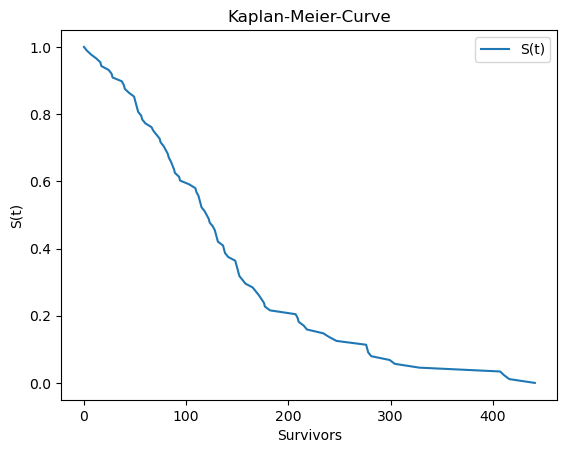

In [53]:
# plot the kaplan meier curve
plt.plot(dfOverall.index, dfOverall['S(t)'], label='S(t)')
plt.title('Kaplan-Meier-Curve')
plt.xlabel('Survivors')
plt.ylabel('S(t)')# plot the kaplan meier curve
plt.plot(dfOverall.index, dfOverall['S(t)'], label='S(t)')
plt.title('Kaplan-Meier-Curve')
plt.xlabel('Survivors')
plt.ylabel('S(t)')
plt.legend()
plt.show()
plt.legend()
plt.show()